In [32]:
from spiketimes.df import waveform_width_by_neuron, peak_asymmetry_by_neuron, mean_firing_rate_ifr_by_neuron
from spiketimes.plots import plot_waveform_peaks
from pyarrow.feather import read_feather
from pathlib import Path
import pandas as pd
from ephys_queries import select_ifr, db_setup_core
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [31]:
data_dir = Path(".").absolute().parent / "data" 
df_peaks = read_feather(data_dir / "waveform_peaks.feather")
df_waves = read_feather(data_dir / "waveforms.feather")

In [3]:
load_dotenv()
engine, metadata = db_setup_core()
df_ifr = select_ifr(engine, metadata, exp_names=["OPTO"], block_name="pre")

In [4]:
df_mfr = mean_firing_rate_ifr_by_neuron(df_ifr)

In [5]:
r1 = waveform_width_by_neuron(df_peaks.dropna())
r2 = peak_asymmetry_by_neuron(df_peaks)

In [93]:
df = pd.merge(r1, r2)
df = pd.merge(df, df_mfr)
df = pd.merge(df, df_ifr[["neuron_id", "group_name"]].drop_duplicates())

In [62]:
save_dir = data_dir = Path(".").absolute().parent / "figs" 

In [40]:
plt.style.use("seaborn-ticks")
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

Text(0.5, 0, 'Time')

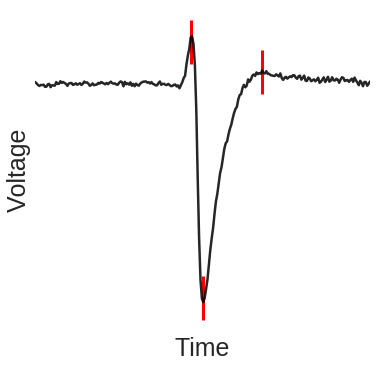

In [74]:
neuron_ids = df_peaks.neuron_id.unique()
neuron = neuron_ids[103]

peaks_kwargs = {'marker': "|", "s": 2000, "linewidth": 3}

ax = plot_waveform_peaks(df_waves, df_peaks, neuron_id=neuron, peaks_plot_kwargs=peaks_kwargs)

ax.get_legend().remove()


ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([])
ax.set_ylabel("Voltage", fontsize=25)
ax.set_xlabel("Time", fontsize=25)
# plt.savefig(save_dir / "waveform_1.png")

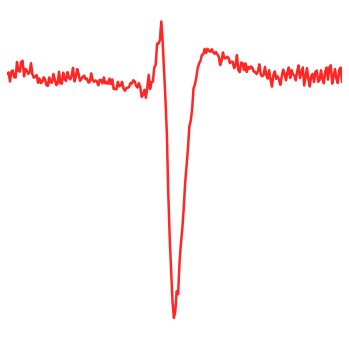

In [82]:
neuron_ids = df_peaks.neuron_id.unique()
neuron = neuron_ids[112]

peaks_kwargs = {"s": 0}
wave_kwargs = {"color": "red"}

ax = plot_waveform_peaks(df_waves, df_peaks, neuron_id=neuron, peaks_plot_kwargs=peaks_kwargs,
                        waveform_plot_kwargs=wave_kwargs)

ax.get_legend().remove()


ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([])
ax.set_ylabel("", fontsize=25)
ax.set_xlabel("", fontsize=25)
# plt.savefig(save_dir / "waveform_2.png")

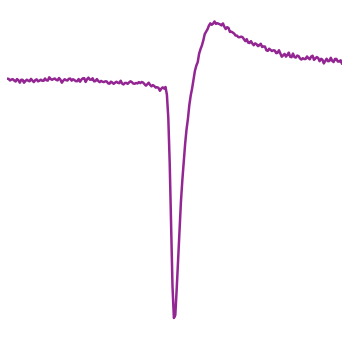

In [86]:
neuron_ids = df_peaks.neuron_id.unique()
neuron = neuron_ids[-53]

peaks_kwargs = {"s": 0}
wave_kwargs = {"color": "purple"}

ax = plot_waveform_peaks(df_waves, df_peaks, neuron_id=neuron, peaks_plot_kwargs=peaks_kwargs,
                        waveform_plot_kwargs=wave_kwargs)

ax.get_legend().remove()


ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([])
ax.set_ylabel("", fontsize=25)
ax.set_xlabel("", fontsize=25)
# plt.savefig(save_dir / "waveform_3.png")

In [96]:
df.group_name.unique()

array(['SERT-CHR2', 'SERT-VGLUT-KO-CHR2'], dtype=object)

In [98]:
df = df.assign(color_ = df["group_name"].map({"SERT-CHR2": "orange", "SERT-VGLUT-KO-CHR2": "purple"}))

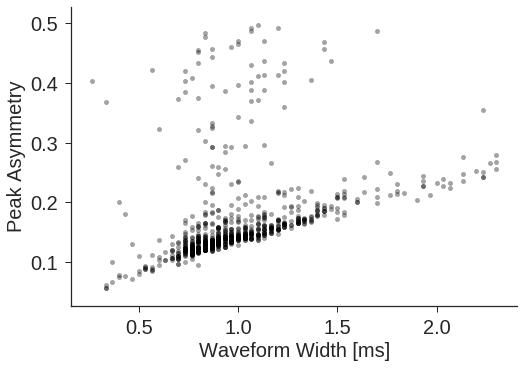

In [106]:
f, ax = plt.subplots()

ax = df.assign(waveform_width=df.waveform_width.divide(30)).plot(x="waveform_width", 
                                                            y="peak_asymmetry", 
                                                            kind="scatter", 
                                                            alpha=0.36,
                                                            color="black",
                                                            ax=ax)
ax.set_xlabel("Waveform Width [ms]", fontsize=20)
ax.set_ylabel("Peak Asymmetry", fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# plt.savefig(save_dir / "peak_asym_x_wavefrom_width.png")

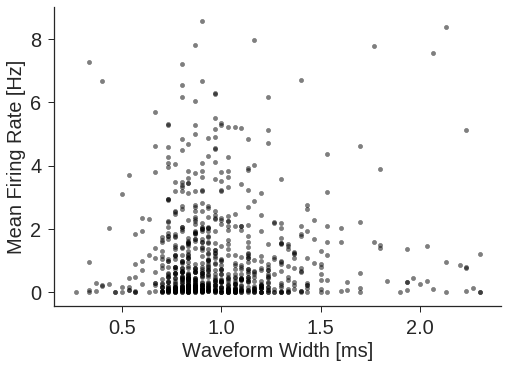

In [88]:
f, ax = plt.subplots()

ax = df.assign(waveform_width=df.waveform_width.divide(30)).plot(x="waveform_width", 
                                                            y="mean_firing_rate", 
                                                            kind="scatter", 
                                                            alpha=0.5, 
                                                            color="black", ax=ax)
ax.set_xlabel("Waveform Width [ms]", fontsize=20)
ax.set_ylabel("Mean Firing Rate [Hz]", fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.savefig(save_dir / "mfr_x_wavefrom_width.png")

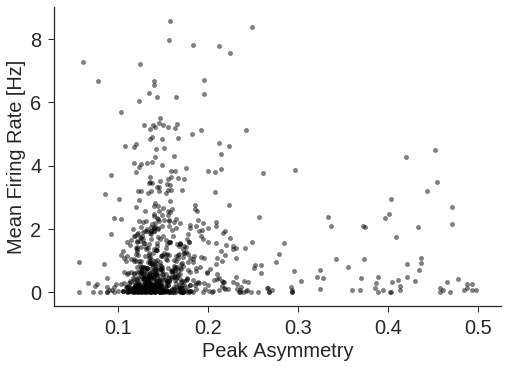

In [89]:
f, ax = plt.subplots()

ax = df.assign(waveform_width=df.waveform_width.divide(30)).plot(x="peak_asymmetry", 
                                                            y="mean_firing_rate", 
                                                            kind="scatter", 
                                                            alpha=0.5, 
                                                            color="black", ax=ax)
ax.set_xlabel("Peak Asymmetry", fontsize=20)
ax.set_ylabel("Mean Firing Rate [Hz]", fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.savefig(save_dir / "mfr_x_peak_asym.png")

In [25]:
df.drop("neuron_id", axis=1).corr()

,waveform_width,peak_asymmetry,mean_firing_rate
waveform_width,1.000000,0.349085,0.025852
peak_asymmetry,0.349085,1.000000,0.015083
mean_firing_rate,0.025852,0.015083,1.000000


In [38]:
df_ifr.ifr.mean()

1.1216454015406978